In [1]:
import random
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

In [2]:
#Folders
projpath = os.path.realpath("../..")
pathfig  = os.path.join(projpath, "Results", "Figures")

In [3]:
random.seed(2037)
def get_random_data(vals1, vals2, vals3, vals4):
    '''
    Generate random data for 2 axis, for 2 sexes and 2 populations
    Vals are 
    '''
    
    males_pop1   = pd.DataFrame({'PC1': [random.gauss(vals1[0], vals1[1]) for _ in range(100)], 'PC2': [random.gauss(vals1[2], vals1[3]) for _ in range(100)] })
    females_pop1 = pd.DataFrame({'PC1': [random.gauss(vals2[0], vals2[1]) for _ in range(100)], 'PC2': [random.gauss(vals2[2], vals2[3]) for _ in range(100)] })
    males_pop2   = pd.DataFrame({'PC1': [random.gauss(vals3[0], vals3[1]) for _ in range(100)], 'PC2': [random.gauss(vals3[2], vals3[3]) for _ in range(100)] })
    females_pop2 = pd.DataFrame({'PC1': [random.gauss(vals4[0], vals4[1]) for _ in range(100)], 'PC2': [random.gauss(vals4[2], vals4[3]) for _ in range(100)] })
    
    x1 = pd.DataFrame({'Sex': 'Male', 'Pop':1}, index = range(1) )
    x1 = pd.concat([pd.concat([x1]*100, ignore_index=True), males_pop1], axis=1)
    x2 = pd.DataFrame({'Sex': 'Female', 'Pop':1}, index = range(1) )
    x2 = pd.concat([pd.concat([x2]*100, ignore_index=True), females_pop1], axis=1)
    x3 = pd.DataFrame({'Sex': 'Male', 'Pop':2}, index = range(1) )
    x3 = pd.concat([pd.concat([x3]*100, ignore_index=True), males_pop2], axis=1)
    x4 = pd.DataFrame({'Sex': 'Female', 'Pop':2}, index = range(1) )
    x4 = pd.concat([pd.concat([x4]*100, ignore_index=True), females_pop2], axis=1)

    dat = pd.concat([x1,x2,x3,x4], axis=0, ignore_index=True) 
    return(dat)

dat  = get_random_data([0.5, 0.3, 0.8, 0.2], [0.8, 0.25, 1.2, 0.25], [0.8, 0.3, 0.1, 0.2], [1.3, 0.3, 0.2, 0.2])
dat2 = get_random_data([0.5, 0.3, 0.8, 0.2], [1.5, 0.25, 0.9, 0.25], [0.8, 0.3, 0.1, 0.2], [1.3, 0.3, 0.2, 0.2])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

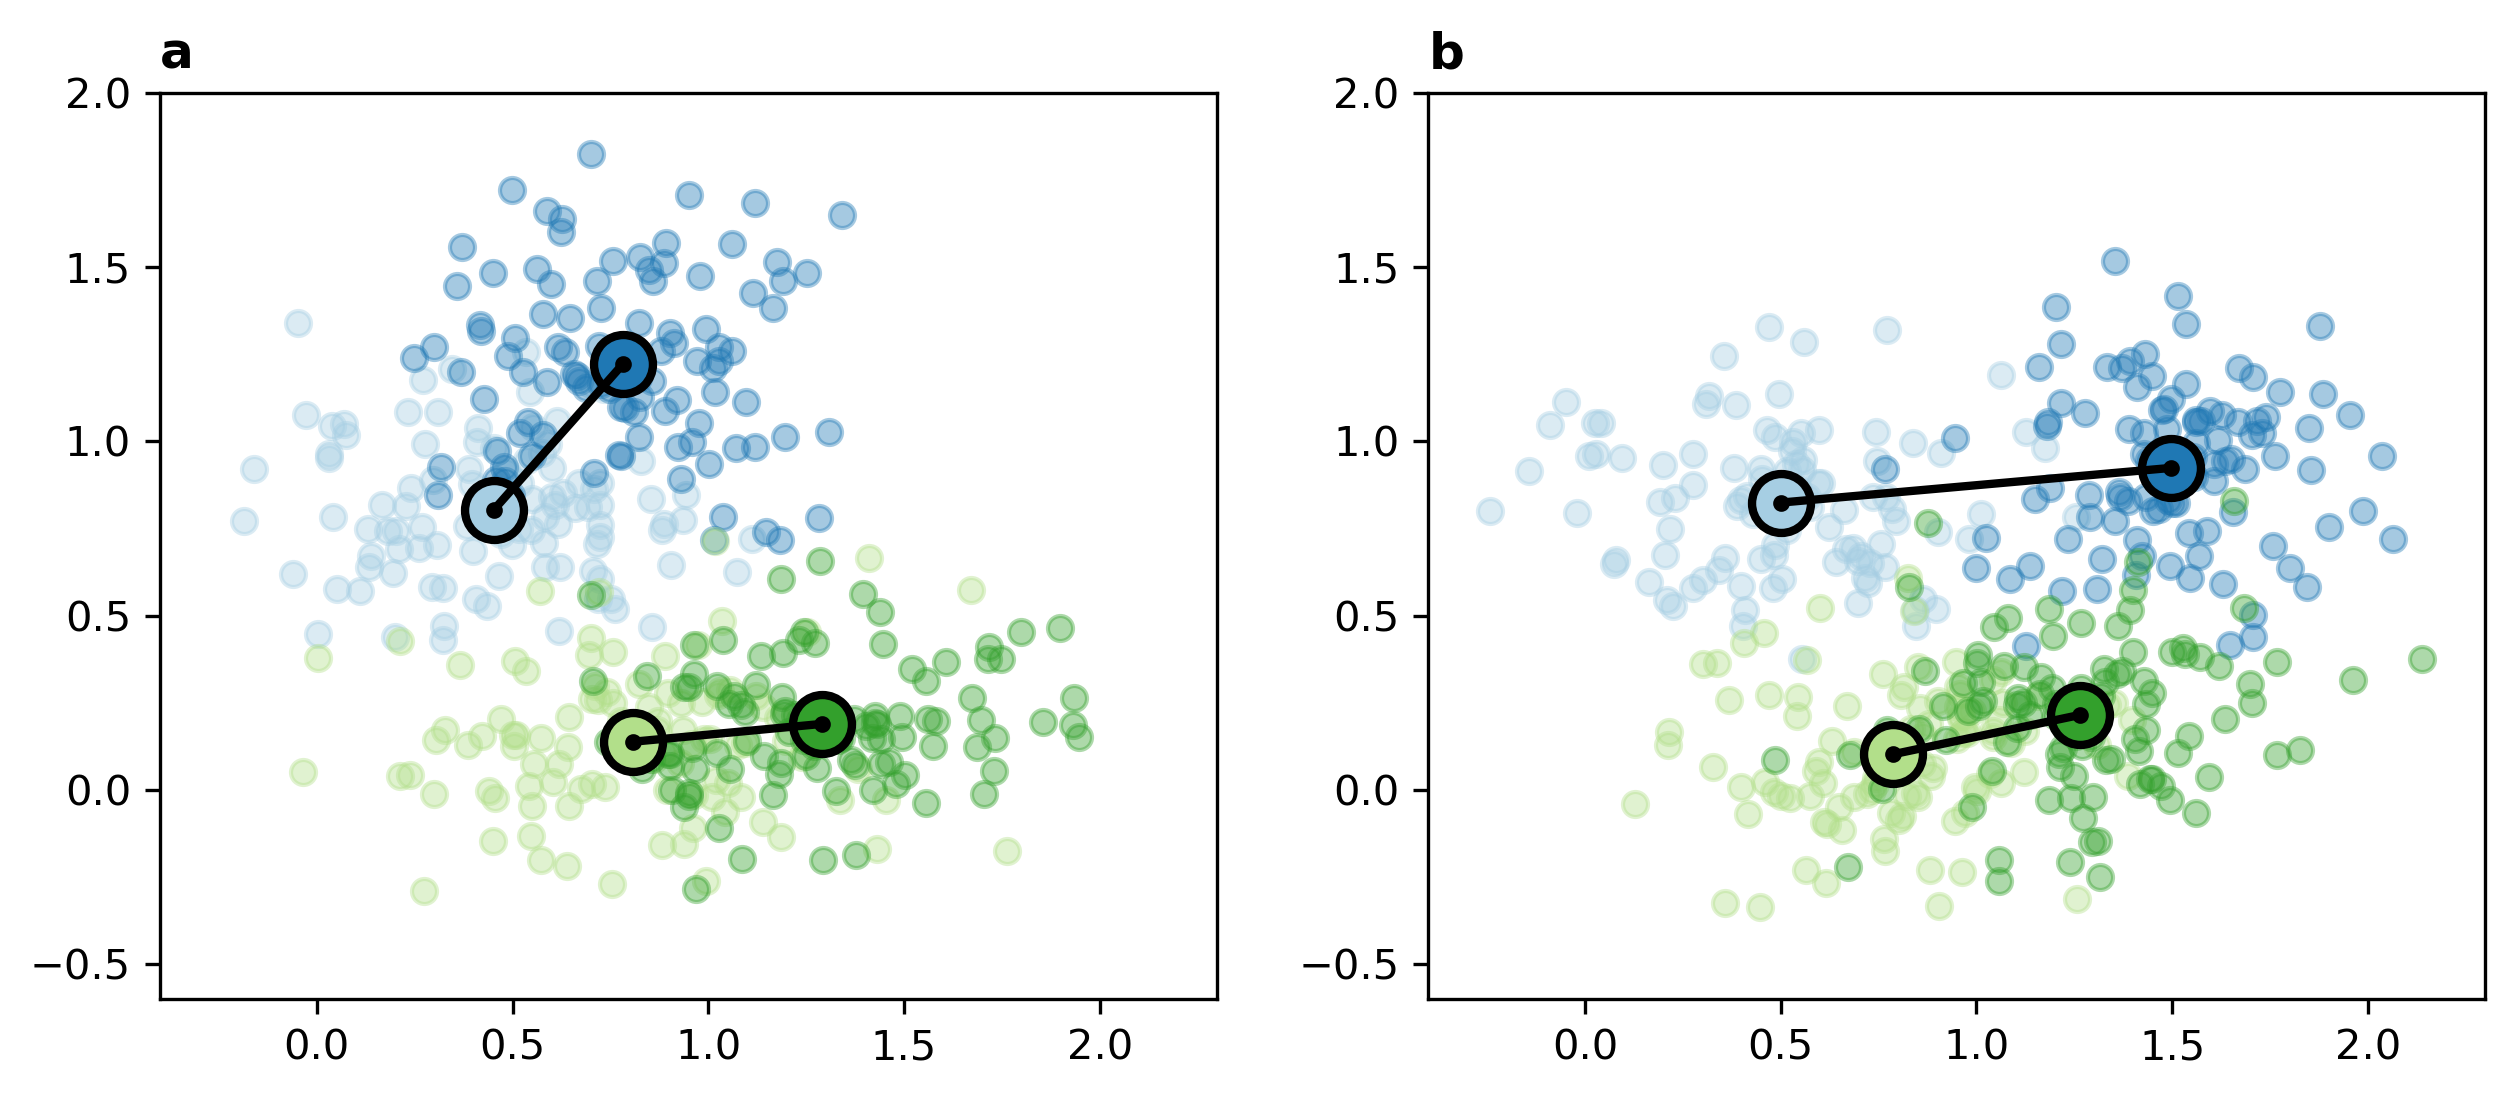

In [4]:
paired = cm.get_cmap('Paired')

fig = plt.figure(dpi = 300, figsize = [10, 4])
ax  = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex=ax, sharey=ax)
alp = 0.4
dot_size = 200
dot_line = 2

males_pop1   = dat.loc[(dat.Sex == 'Male') & (dat.Pop == 1)]
females_pop1 = dat.loc[(dat.Sex == 'Female') & (dat.Pop == 1)]
males_pop2   = dat.loc[(dat.Sex == 'Male') & (dat.Pop == 2)]
females_pop2 = dat.loc[(dat.Sex == 'Female') & (dat.Pop == 2)]

ax.scatter(males_pop1['PC1'], males_pop1['PC2'], alpha=alp, c=paired.colors[0])
ax.scatter(females_pop1['PC1'], females_pop1['PC2'], alpha=alp, c=paired.colors[1])
x1 = males_pop1['PC1'].mean()
y1 = males_pop1['PC2'].mean()
x2 = females_pop1['PC1'].mean()
y2 = females_pop1['PC2'].mean()
ax.plot([x1, x2], [y1, y2], linewidth=dot_line, c='black', marker='.')
ax.scatter(x1, y1, c=paired.colors[0], s=dot_size, edgecolors='black', linewidths=dot_line )
ax.scatter(x2, y2, c=paired.colors[1], s=dot_size, edgecolors='black', linewidths=dot_line )

ax.scatter(males_pop2['PC1'], males_pop2['PC2'], alpha=alp, c=paired.colors[2])
ax.scatter(females_pop2['PC1'], females_pop2['PC2'], alpha=alp, c=paired.colors[3])
x1 = males_pop2['PC1'].mean()
y1 = males_pop2['PC2'].mean()
x2 = females_pop2['PC1'].mean()
y2 = females_pop2['PC2'].mean()
ax.plot([x1, x2], [y1, y2], linewidth=dot_line, c='black', marker='.')
ax.scatter(x1, y1, c=paired.colors[2], s=dot_size, edgecolors='black', linewidths=dot_line )
ax.scatter(x2, y2, c=paired.colors[3], s=dot_size, edgecolors='black', linewidths=dot_line )
ax.set_title('a', loc = 'left', fontweight='bold')
plt.xlim(-0.4, 2.3)
plt.ylim(-0.6, 2)

males_pop1   = dat2.loc[(dat2.Sex == 'Male') & (dat2.Pop == 1)]
females_pop1 = dat2.loc[(dat2.Sex == 'Female') & (dat2.Pop == 1)]
males_pop2   = dat2.loc[(dat2.Sex == 'Male') & (dat2.Pop == 2)]
females_pop2 = dat2.loc[(dat2.Sex == 'Female') & (dat2.Pop == 2)]

ax2.scatter(males_pop1['PC1'], males_pop1['PC2'], alpha=alp, c=paired.colors[0])
ax2.scatter(females_pop1['PC1'], females_pop1['PC2'], alpha=alp, c=paired.colors[1])
x1 = males_pop1['PC1'].mean()
y1 = males_pop1['PC2'].mean()
x2 = females_pop1['PC1'].mean()
y2 = females_pop1['PC2'].mean()
ax2.plot([x1, x2], [y1, y2], linewidth=dot_line, c='black', marker='.')
ax2.scatter(x1, y1, c=paired.colors[0], s=dot_size, edgecolors='black', linewidths=dot_line )
ax2.scatter(x2, y2, c=paired.colors[1], s=dot_size, edgecolors='black', linewidths=dot_line )

ax2.scatter(males_pop2['PC1'], males_pop2['PC2'], alpha=alp, c=paired.colors[2])
ax2.scatter(females_pop2['PC1'], females_pop2['PC2'], alpha=alp, c=paired.colors[3])
x1 = males_pop2['PC1'].mean()
y1 = males_pop2['PC2'].mean()
x2 = females_pop2['PC1'].mean()
y2 = females_pop2['PC2'].mean()
ax2.plot([x1, x2], [y1, y2], linewidth=dot_line, c='black', marker='.')
ax2.scatter(x1, y1, c=paired.colors[2], s=dot_size, edgecolors='black', linewidths=dot_line )
ax2.scatter(x2, y2, c=paired.colors[3], s=dot_size, edgecolors='black', linewidths=dot_line )
ax2.set_title('b', loc = 'left', fontweight='bold')


os.chdir(pathfig)
plt.savefig("Figure1.png", dpi = 300, bbox_inches='tight')
plt.show()

In [5]:
%load_ext rpy2.ipython

In [6]:
%Rpush dat dat2

/home/tomas/anaconda3/envs/py/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [7]:
%%R

#Now we'll use R

#Calling libraries
library(car)

get_manova <- function(dat){
    y.mat <- as.matrix(dat[,3:4])
    #Fiting regression and MANOVA
    fit   <- lm(y.mat ~ dat$Sex * dat$Pop)
    print(Manova(fit, test.statistic = "Wilks"))
}   

get_manova(dat)
get_manova(dat2)

get_twostate <- function(dat){
    y.mat <- as.matrix(dat[,3:4])
    #1. Generating full and reduced matrices
    x.mat.full <- model.matrix( ~ Sex * Pop, data=dat)
    x.mat.red  <- x.mat.full[,1:3]

    #2. Estimate parameters
    b.mat.full <- solve((t(x.mat.full) %*% x.mat.full)) %*% (t(x.mat.full) %*% y.mat)
    b.mat.red  <- solve((t(x.mat.red) %*% x.mat.red)) %*% (t(x.mat.red) %*% y.mat)

    #3. Estimate means
    a1b1 <- cbind(1,1,1,1)
    a1b2 <- cbind(1,0,1,0)
    a2b1 <- cbind(1,1,2,2)
    a2b2 <- cbind(1,0,2,0)
    
    x.ls.full <- rbind(a1b1,a1b2,a2b1,a2b2)
    x.ls.red  <- x.ls.full[,-4]

    obs.ls.full <- x.ls.full%*%b.mat.full  # Observed ls means (full model)
    obs.ls.red  <- x.ls.red%*%b.mat.red     # Observed ls means (reduced model)
    cat("\n")

    #4. Vector and statistics calculations 
    obs.a1.vect <- obs.ls.full[1,]-obs.ls.full[2,] # These are the phenotypic change vectors
    obs.a2.vect <- obs.ls.full[3,]-obs.ls.full[4,]

    obs.d.a1 <- sqrt(t(obs.a1.vect)%*%obs.a1.vect) # These are lengths of vectors
    obs.d.a2 <- sqrt(t(obs.a2.vect)%*%obs.a2.vect)

    obs.contrast <- abs(obs.d.a1-obs.d.a2)
    obs.angle    <- acos(t((obs.a1.vect)/obs.d.a1)%*%((obs.a2.vect)/obs.d.a2))
    obs.angle    <- obs.angle*180/pi  # This step is only necessary to convert radians to degrees

    print(obs.angle)
    print(obs.contrast)

    #5. Permutation
    y.hat <- x.mat.red%*%b.mat.red     # Predicted values from reduced model
    y.res <- y.mat-y.hat               # Resdiuals of reduced mode (these are the permuted units)
    permute <- 9999
    ngroups <- 2
  
    dist.contrast <- matrix(0, nrow = (permute + 1), ncol = ngroups * (ngroups-1) / 2)
    dist.contrast[1,] <- obs.contrast # Observed values are first random values
  
    dist.angle <- matrix(0, nrow = (permute + 1), ncol = ngroups * (ngroups-1) / 2)
    dist.angle[1,] <- obs.angle # Observed values are first random values

    # Create an array from 1 to number of object in data set
    # This will be randomized later
    line <- array(1:(length(x.mat.full[,1])),dim=c(length(x.mat.full[,1])))
    for (i in 1:permute){
        line.rand  <- sample(line, replace=FALSE)
        y.res.temp <- cbind(line.rand, y.res)
        z <- (order(line.rand))
        y.res.temp2 <- as.matrix(y.res.temp[z,])
        y.res.rand  <- y.res.temp2[,-1]  # Rows of residuals are now randomized
    
        # Create random values
        y.rand <- y.hat + y.res.rand
    
        # Estimate parameters
        b.mat.rand <- solve((t(x.mat.full)%*%x.mat.full))%*%(t(x.mat.full)%*%y.rand)
    
        # Calculate LS means
        rand.ls.full <- x.ls.full%*%b.mat.rand
    
        # Repeat fourth step for random data!
        rand.vect <- matrix(0, nrow = ngroups , ncol = ncol(rand.ls.full)) 
        for (l in 1:ngroups){
          rand.vect[l,] <- rand.ls.full[l,] - rand.ls.full[l+ngroups,] # These are the phenotypic change vectors
        }
    
        #Lengths
        rand.d <- matrix(0, nrow = ngroups, ncol = 1)
        for (l in 1:ngroups){
          rand.d[l,] <- sqrt(t(rand.vect[l,]) %*% rand.vect[l,]) # These are lengths of vectors
        }
    
        #Contrast
        rand.contrast <- matrix(0, nrow = ngroups * (ngroups-1) / 2, ncol = 1)
        row = 1
        for (l in 1:ngroups){
          t = l + 1
          while (t <= ngroups){
            rand.contrast[row,1] <- abs(rand.d[l,1] - rand.d[t,1] )
            t = t + 1
            row = row + 1
          }
        }
    
        #Angles
        rand.angle <- matrix(0, nrow = ngroups * (ngroups-1) / 2, ncol = 1)
        row = 1
        for (l in 1:ngroups){
          t = l + 1
          while (t <= ngroups){
            rand.angle[row,1] <- acos(t((rand.vect[l,]) / rand.d[l,1]) %*% ((rand.vect[t,])/rand.d[t,1]))
            rand.angle[row,1] <- rand.angle[row,1]*180/pi # This step is only necessary to convert radians to degrees
            t = t + 1
            row = row + 1
          }
        }
    
        # Append distributions
        dist.contrast[i+1,] <- rand.contrast
        dist.angle[i+1,]    <- rand.angle   
    }

    print(sum(dist.contrast[1,1] < dist.contrast[2:10000,1])/10000)
    print(sum(dist.angle[1,1] < dist.angle[2:10000,1])/10000)
}

get_twostate(dat)
get_twostate(dat2)


/home/tomas/anaconda3/envs/py/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: carData

  warnings.warn(x, RRuntimeWarning)



Type II MANOVA Tests: Wilks test statistic
                Df test stat approx F num Df den Df    Pr(>F)    
dat$Sex          1   0.56196   153.95      2    395 < 2.2e-16 ***
dat$Pop          1   0.17653   921.28      2    395 < 2.2e-16 ***
dat$Sex:dat$Pop  1   0.82665    41.42      2    395 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Type II MANOVA Tests: Wilks test statistic
                Df test stat approx F num Df den Df    Pr(>F)    
dat$Sex          1   0.35211   363.41      2    395 < 2.2e-16 ***
dat$Pop          1   0.25481   577.57      2    395 < 2.2e-16 ***
dat$Sex:dat$Pop  1   0.81541    44.71      2    395 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         [,1]
[1,] 45.68834
           [,1]
[1,] 0.04900026
[1] 0.3249
[1] 0

         [,1]
[1,] 7.599642
          [,1]
[1,] 0.5126729
[1] 0
[1] 0.1168
